<h1> K-Mean Clustering Example using Principal Component Analysis Visualization </h1>

<h2> Setup </h2>

Setup the environment

In [1]:
#import rpy2
#%load_ext rpy2.ipython

setwd("C:/Users/colton.willig/Desktop/")
rm(list=ls())
require("datasets")

<br>

<h2> Data </h2>

Load the a default R dataset for car information

In [2]:
data(mtcars)

Here is a glimpse at the data

In [3]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


<br>

<h2> Principal Component Analysis </h2>

Use the built-in principal component analysis function, using mean normalization on the data

In [4]:
pca = prcomp(mtcars, center=TRUE, scale.=TRUE)

Here is a summary of the principal component analysis

In [5]:
summary(pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     2.5707 1.6280 0.79196 0.51923 0.47271 0.46000 0.3678
Proportion of Variance 0.6008 0.2409 0.05702 0.02451 0.02031 0.01924 0.0123
Cumulative Proportion  0.6008 0.8417 0.89873 0.92324 0.94356 0.96279 0.9751
                           PC8    PC9    PC10   PC11
Standard deviation     0.35057 0.2776 0.22811 0.1485
Proportion of Variance 0.01117 0.0070 0.00473 0.0020
Cumulative Proportion  0.98626 0.9933 0.99800 1.0000

These standard deviation values are the square roots of the eigenvalues of the covariance matrix for the data

Notice that the first three principal components explain approximately 90% of the variance in the data

Use ggplot2 to plot the the first two principal components for the data,
giving the best spatial visualization of the data

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

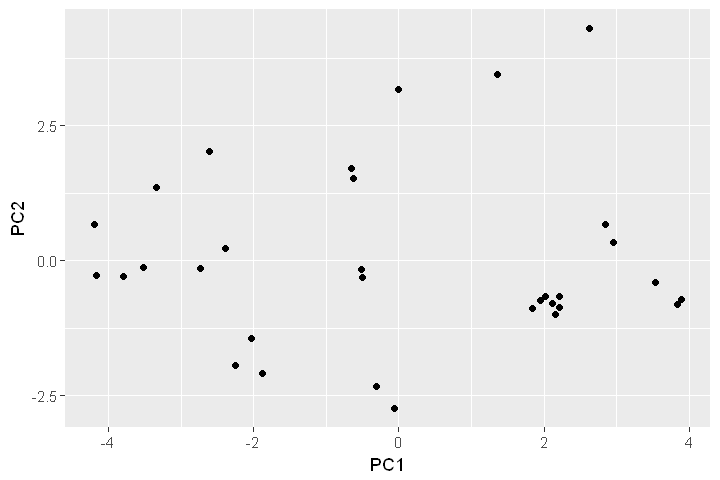

In [6]:
suppressMessages(require(ggplot2))
options(repr.plot.width=6, repr.plot.height=4)
ggplot(data.frame(pca$x)) + aes(x=PC1, y=PC2) + geom_point()

<br>

<h2> K-Means Clustering </h2>

Cluster the original data using k-means, first with an explicit example using 3 clusters ($k=3$).

The cluster means, cluster indices and the normalized within sum of squares are shown.

(Confirmation of the withinSS computation is shown with the explicit cost function.)

In [7]:
set.seed(283)
clusters = kmeans(mtcars, centers=3, nstart=20)
clusters$centers
rbind(clusters$cluster)
sum(round(clusters$withinss / dim(mtcars)[1], 0))

cost = 0
for (i in 1:dim(mtcars)[1]) {
    cost = cost + sum((mtcars[i,] - clusters$centers[clusters$cluster[i],])^2)
}
round(cost / dim(mtcars)[1], 0)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,24.50000,4.625000,122.2937,96.8750,4.002500,2.518000,18.54312,0.7500000,0.6875000,4.125000,2.437500
2,14.64444,8.000000,388.2222,232.1111,3.343333,4.161556,16.40444,0.0000000,0.2222222,3.444444,4.000000
3,17.01429,7.428571,276.0571,150.7143,2.994286,3.601429,18.11857,0.2857143,0.0000000,3.000000,2.142857


Mazda RX4,Mazda RX4 Wag,Datsun 710,Hornet 4 Drive,Hornet Sportabout,Valiant,Duster 360,Merc 240D,Merc 230,Merc 280,...,AMC Javelin,Camaro Z28,Pontiac Firebird,Fiat X1-9,Porsche 914-2,Lotus Europa,Ford Pantera L,Ferrari Dino,Maserati Bora,Volvo 142E
1,1,1,3,2,3,2,1,1,1,...,3,2,2,1,1,1,2,1,2,1


[1] 2854

[1] 2854

Now the withinSS is shown for increasing choices of $k$ (the specified number of clusters for which to look).

Notice that this error quickly drops off, as better fitting clusters are determined.

Typically a <i>knee point</i> is sought, where the error has been effectively minimized,
and further clusters provide very marginal gains in error reduction.

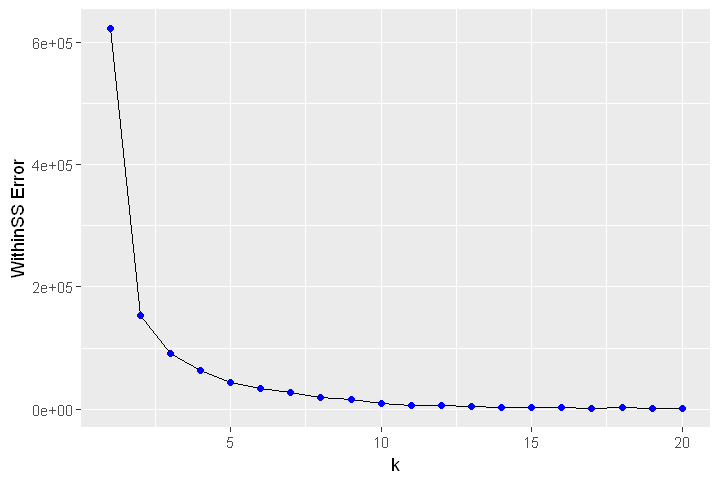

In [8]:
set.seed(283)
N = 20
withinSS = rep(NA, N)
for (k in 1:N) {
    clusters = kmeans(mtcars, center=k, nstart=20)
    withinSS[k] = round(sum(clusters$withinss), 0)
#     print(paste("N = ", N, sep=""))
#     print(paste("The withinSS for k=", k, " is ", round(sum(clusters$withinss), 0), sep=""))
#     print(paste("The totSS = ", round(clusters$totss, 0), sep=""))
#     print(paste("The betweenSS = ", round(clusters$betweenss, 0), sep=""))
#     print(paste("---------------------------"))
}

require(ggplot2)
ggplot() + aes(x=1:N, y=withinSS) + geom_line() + geom_point(col="blue") + xlab("k") + ylab("WithinSS Error")

The PCA spatial visualization is now highlighted by the cluster choices for various $k$,
in order to demonstrate how well the clusters are partitioning the data.

In [9]:
show_clusters = function(k) {
    clusters = kmeans(mtcars, centers=k, nstart=20)
    options(repr.plot.width=4, repr.plot.height=3)
    ggplot(data.frame(pca$x)) + aes(x=PC1, y=PC2) + geom_point(col=clusters$cluster)
}

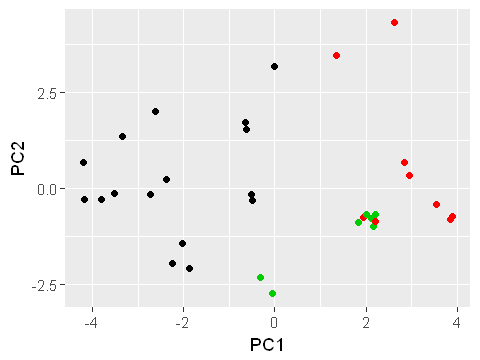

In [10]:
show_clusters(3)